1203

In [2]:
# import part
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
from keras import backend as K
import matplotlib.pyplot as plt

# download data
clean_mask = np.loadtxt("clean_mask_train_1000")
spec_train = np.loadtxt("clean_spec_train_1000")
clean_mask_test = np.loadtxt("clean_mask_test_1000")
spec_train_test = np.loadtxt("clean_spec_test_1000")

# data pre-processing
X_train = spec_train
X_test = spec_train_test
y_train = clean_mask
y_test = clean_mask_test



In [4]:
# Only one fully connected layer with 100 nodes
# sigmoid as activation function
model = Sequential([
    Dense(2470, input_dim=2470),
    Activation('sigmoid'),  # ,sigmoid softmax
    
])

Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/step - loss: 0.1512 - acc: 0.0040 - val_loss: 0.0997 - val_acc: 0.0080
Epoch 2/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0902 - acc: 0.0053 - val_loss: 0.0718 - val_acc: 0.0080
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0694 - acc: 0.0067 - val_loss: 0.0568 - val_acc: 0.0040
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0573 - acc: 0.0067 - val_loss: 0.0474 - val_acc: 0.0080
Epoch 5/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0491 - acc: 0.0093 - val_loss: 0.0410 - val_acc: 0.0080
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0434 - acc: 0.0067 - val_loss: 0.0365 - val_acc: 0.0080
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0392 - acc: 0.0093 - val_loss: 0.0333 - val_acc:

750/750 [==============================] - 1s 1ms/step - loss: 0.0170 - acc: 0.0280 - val_loss: 0.0204 - val_acc: 0.0120
Epoch 62/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0169 - acc: 0.0253 - val_loss: 0.0204 - val_acc: 0.0120
Epoch 63/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0168 - acc: 0.0267 - val_loss: 0.0204 - val_acc: 0.0120
Epoch 64/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0167 - acc: 0.0267 - val_loss: 0.0204 - val_acc: 0.0120
Epoch 65/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0166 - acc: 0.0280 - val_loss: 0.0203 - val_acc: 0.0120
Epoch 66/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0165 - acc: 0.0280 - val_loss: 0.0203 - val_acc: 0.0160
Epoch 67/100
750/750 [==============================] - 1s 1ms/step - loss: 0.0164 - acc: 0.0293 - val_loss: 0.0203 - val_acc: 0.0160
Epoch 68/100
750/750 [==============================] - 1s 1ms/step - loss:

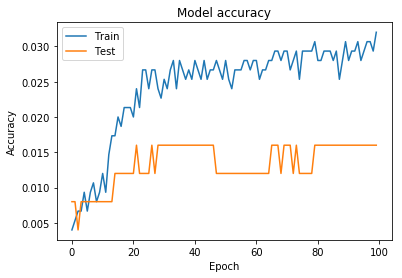

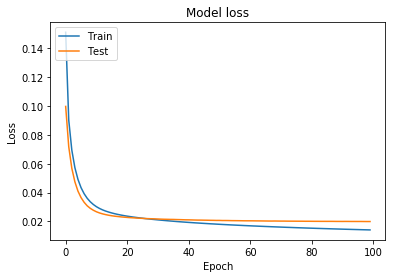

IndexError: list index out of range

In [5]:
# optimizer

rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(
    optimizer=rmsprop,
    loss='mean_squared_error',
    metrics=['accuracy']  # , mean_pred]
)


print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=75, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output1 = get_3rd_layer_output([spec_train])[0]